<a href="https://colab.research.google.com/github/Govind4499/Banking-System/blob/main/COVIDX_Detection_of_COVID19_using_chest_X_Ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 29.34 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os
base_dir = '/content/datasets/Data'
train_dir=os.path.join(base_dir,'train')
test_dir=os.path.join(base_dir,'test')
train_covid_dir=os.path.join(train_dir,'COVID19')
train_normal_dir=os.path.join(train_dir,'NORMAL')
test_covid_dir=os.path.join(test_dir,'COVID19')
test_normal_dir=os.path.join(test_dir,'NORMAL')

In [ ]:
train_covid_names=os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names=os.listdir(train_normal_dir)
print(train_covid_names[:10])

test_covid_names=os.listdir(test_covid_dir)
print(test_covid_names[:10])


test_normal_names=os.listdir(test_normal_dir)
print(test_covid_names[:10])

['COVID-19 (192).jpg', 'COVID19(451).jpg', 'COVID19(366).jpg', 'COVID19(559).jpg', 'COVID19(87).jpg', 'COVID-19 (13).jpeg', 'COVID19(268).jpg', 'COVID19(422).jpg', 'COVID19(544).jpg', 'COVID19(159).jpg']
['COVID-19 (192).jpg', 'COVID19(451).jpg', 'COVID19(366).jpg', 'COVID19(559).jpg', 'COVID19(87).jpg', 'COVID-19 (13).jpeg', 'COVID19(268).jpg', 'COVID19(422).jpg', 'COVID19(544).jpg', 'COVID19(159).jpg']
['COVID-19 (439).jpg', 'COVID19(573).jpg', 'COVID19(8).jpg', 'COVID-19 (547).jpg', 'COVID-19 (831).jpg', 'COVID19(35).jpg', 'COVID19(449).jpg', 'COVID19(85).jpg', 'COVID-19 (876).jpg', 'COVID19(58).jpg']
['COVID-19 (439).jpg', 'COVID19(573).jpg', 'COVID19(8).jpg', 'COVID-19 (547).jpg', 'COVID-19 (831).jpg', 'COVID19(35).jpg', 'COVID19(449).jpg', 'COVID19(85).jpg', 'COVID-19 (876).jpg', 'COVID19(58).jpg']


In [ ]:
print("train dataset covid images: ",len(train_covid_names))
print("train dataset normal images: ",len(train_normal_names))
print("test dataset covid images: ",len(test_covid_names))
print("test dataset normal images: ",len(test_normal_names))
print("total train images: ",len(train_covid_names+train_normal_names))
print("total test covid images: ",len(test_covid_names+test_normal_names))

train dataset covid images:  545
train dataset normal images:  1266
test dataset covid images:  167
test dataset normal images:  317
total train images:  1811
total test covid images:  484


In [ ]:
# DATA VISUALIZATION

['/content/datasets/Data/train/COVID19/COVID-19 (192).jpg', '/content/datasets/Data/train/COVID19/COVID19(451).jpg', '/content/datasets/Data/train/COVID19/COVID19(366).jpg', '/content/datasets/Data/train/COVID19/COVID19(559).jpg', '/content/datasets/Data/train/COVID19/COVID19(87).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (13).jpeg', '/content/datasets/Data/train/COVID19/COVID19(268).jpg', '/content/datasets/Data/train/COVID19/COVID19(422).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(1030).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1007).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(706).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1135).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(867).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1121).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(210).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1517).jpg']


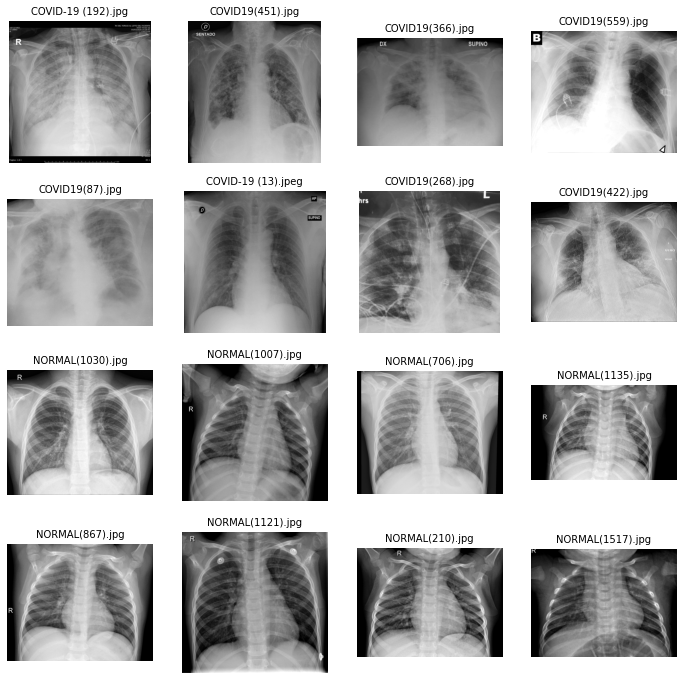

In [ ]:

import matplotlib.image as mpimg
nrows=4
ncols=4
fig=plt.gcf()
fig.set_size_inches(12,12)

next_covid_pic=[os.path.join(train_covid_dir,fname) for fname in train_covid_names[0:8]]
next_normal_pic=[os.path.join(train_normal_dir,fname) for fname in train_normal_names[0:8]]


print(next_covid_pic)
print(next_normal_pic)

for i, img_path in enumerate(next_covid_pic+next_normal_pic):
  data=img_path.split('/',6)[6]
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('off')
  img=mpimg.imread(img_path)
  sp.set_title(data,fontsize=10)
  plt.imshow(img,cmap='gray')
plt.show()  

In [ ]:
# DATA AUGMENTATION

In [ ]:


train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2,zoom_range=0.2,horizontal_flip=True)


validation_datagen=ImageDataGenerator(rescale=1./255)



test_datagen=ImageDataGenerator(rescale=1./255)


train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),subset='training',batch_size=32,class_mode='binary')

validation_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),subset='validation',batch_size=32,class_mode='binary')

test_generator=test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=32,class_mode='binary')



Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

In [ ]:
#CONVOLUTIONAL MODEL

In [ ]:
model=Sequential()

model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(150,150,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))



model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))



model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

In [ ]:
# COMPILE AND TRAINING


In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history=model.fit(train_generator,epochs=10,validation_data=validation_generator,validation_steps=10)


Epoch 1/10
46/46 [==============================] - 162s 4s/step - loss: 0.1394 - accuracy: 0.9510 - val_loss: 0.1940 - val_accuracy: 0.9156
Epoch 2/10
46/46 [==============================] - 154s 3s/step - loss: 0.0976 - accuracy: 0.9703 - val_loss: 0.0709 - val_accuracy: 0.9781
Epoch 3/10
46/46 [==============================] - 153s 3s/step - loss: 0.1073 - accuracy: 0.9738 - val_loss: 0.0777 - val_accuracy: 0.9812
Epoch 4/10
46/46 [==============================] - 155s 3s/step - loss: 0.0791 - accuracy: 0.9731 - val_loss: 0.0932 - val_accuracy: 0.9688
Epoch 5/10
46/46 [==============================] - 152s 3s/step - loss: 0.0842 - accuracy: 0.9689 - val_loss: 0.1155 - val_accuracy: 0.9469
Epoch 6/10
46/46 [==============================] - 152s 3s/step - loss: 0.0853 - accuracy: 0.9745 - val_loss: 0.1128 - val_accuracy: 0.9563
Epoch 7/10
46/46 [==============================] - 151s 3s/step - loss: 0.1206 - accuracy: 0.9600 - val_loss: 0.0967 - val_accuracy: 0.9656
Epoch 8/10
46

In [ ]:
history.history.keys()


NameError: ignored

Text(0.5, 0, 'epoch')

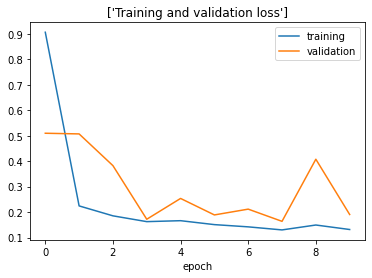

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title(['Training and validation loss'])
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

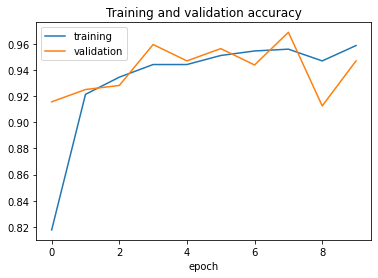

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss,test_acc=model.evaluate(test_generator)
print('test acc:{} test loss:{}'.format(test_acc,test_loss))

16/16 [==============================] - 18s 1s/step - loss: 0.1466 - accuracy: 0.9607
test acc:0.96074378490448 test loss:0.14656521379947662


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image


uploaded=files.upload()
for fn in uploaded.keys():
  path='/content/'+fn 
  print(path)
  img=image.load_img(path,target_size=(150,150))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  classes=model.predict(images,batch_size=10)
  print(fn)
  if classes==0:
    print('COVID-19 X-Ray Image')
  else:
    print('Normal X-Ray Image')



Saving COVID-19 (313).jpg to COVID-19 (313).jpg
/content/COVID-19 (313).jpg


NameError: ignored

In [ ]:
model.save('model.covidpredict')

INFO:tensorflow:Assets written to: model.covidpredict/assets


In [ ]:
from google.colab import files
files.download('model.covidpredict')